# Benchmarks for Simple Mat2 Multiply

First lets load in our benchmark files generated from the C++ program

In [6]:
import numpy as np

files=['AVX2.txt','Normal.txt','Operator.txt','Prefetch.txt',
       'SIMD.txt','Unroll.txt']

timings={}

for file in files :
    dataFile=open(file,'r')
    fileData=dataFile.readlines()
    durations=[]
    for i in fileData :
        if 'Duration' in i :
            data=i.split('\t')
            durations.append(int(data[1]))
    col=file.split('.')
    timings[col[0]]=durations


Now we can do some data analysis on the times and see what happens

In [2]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.DataFrame(data=timings)
df.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])


,AVX2,Normal,Operator,Prefetch,SIMD,Unroll
count,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06
mean,5.021271e+01,4.644901e+01,4.840798e+01,4.698374e+01,4.901817e+01,4.630492e+01
std,7.523006e+01,1.108855e+02,2.167037e+02,4.965014e+01,1.152047e+02,1.350511e+02
min,4.500000e+01,4.100000e+01,4.300000e+01,4.400000e+01,4.400000e+01,4.100000e+01
25%,4.600000e+01,4.300000e+01,4.400000e+01,4.400000e+01,4.400000e+01,4.300000e+01
50%,4.600000e+01,4.300000e+01,4.400000e+01,4.500000e+01,4.500000e+01,4.300000e+01
75%,5.900000e+01,4.600000e+01,4.500000e+01,4.500000e+01,4.500000e+01,4.400000e+01
90%,5.900000e+01,5.200000e+01,5.700000e+01,5.700000e+01,5.800000e+01,5.400000e+01
99%,6.600000e+01,6.600000e+01,6.700000e+01,5.800000e+01,7.000000e+01,6.600000e+01
99.9%,7.000000e+01,6.700000e+01,1.030000e+02,7.200000e+01,1.080000e+02,9.500000e+01


Text(0.0, 0.5, 'Number of Samples')

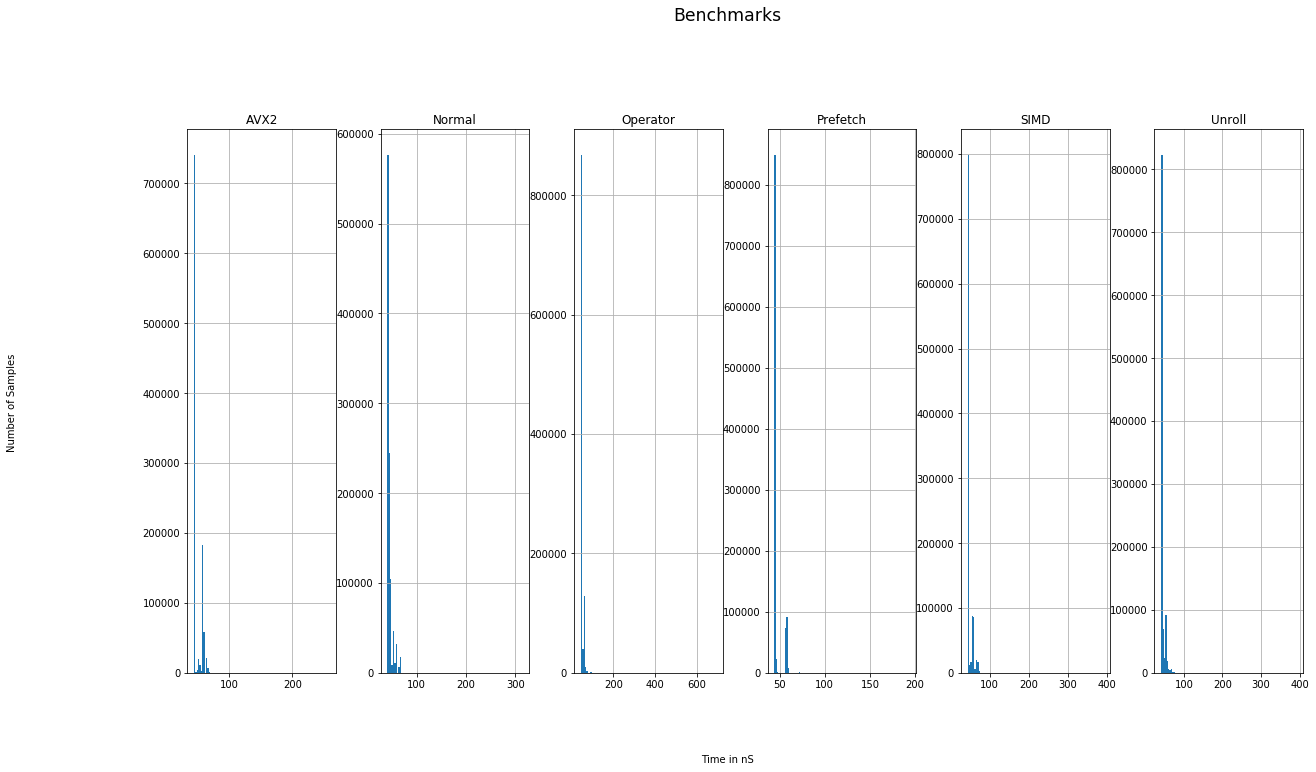

In [7]:
S = df
# keep only the ones that are within +3 to -3 standard deviations  
S=  S[~((S-S.mean()).abs() > 3*S.std())]

ndf = pd.DataFrame(data=S)
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=False, sharey=False,
                        figsize=(20, 10))


ndf.hist(grid=True,  bins=100,ax=axes )
plt.suptitle('Benchmarks', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.0, 'Time in nS', ha='center')
fig.text(0.0, 0.5, 'Number of Samples', va='center', rotation='vertical')
